In [2]:
import geopandas as gp
geometry_df = gp.read_file('./Borough Boundaries/geo_export_af57ed2a-558b-46a2-9da6-2daa495b229d.shp')
geometry_df = geometry_df.set_index('boro_name')
nybb_path = gp.datasets.get_path('nybb')
boros = gp.GeoDataFrame.from_file(nybb_path)
boros = boros.to_crs({'init': 'epsg:4326'}) 
boros = boros.set_index('BoroName')
Manhattan_geometry = boros['geometry']['Manhattan']
simplified_Manhattan_geometry = Manhattan_geometry.simplify(0.004, preserve_topology=False)

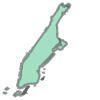

In [3]:
Manhattan_geometry

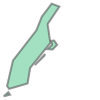

In [4]:
simplified_Manhattan_geometry

In [5]:
xm, ym, xM, yM = Manhattan_geometry.bounds
xm, ym, xM, yM

(-74.04772962697038, 40.68291694544517, -73.90665099539478, 40.879038047307276)

In [8]:
import pandas as pd
df = pd.read_csv('yellow_tripdata_2016-06.csv')
df = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'fare_amount', 'trip_distance']]

In [ ]:
import numpy as np
from shapely.geometry import Point
pickup_coords = df[['pickup_longitude','pickup_latitude']].values
pickup_in_Manhattan = [Point(*point).within(simplified_Manhattan_geometry) for point in pickup_coords]
dropoff_in_Manhattan = [Point(*point).within(simplified_Manhattan_geometry) for point in dropoff_coords]
df['in_Manhattan'] = pd.Series(np.array(pickup_in_Manhattan) * np.array(dropoff_in_Manhattan), index=df.index)

In [ ]:
import datetime
from dateutil import parser
day = [parser.parse(df['tpep_pickup_datetime'].values[i]).day for i in range(len(df))]
df['day'] = pd.Series(day, index=df.index)

In [ ]:
for name, group in df.groupby('day'):
    np.save('./day_' + str(name), group.values)